<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Ejercicios_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import random
from IPython.display import Image

## Integrales

## Capacidad calorifica Debye


La fórmula de Debye para la capacidad calorífica de un sólido  en límite de bajas temperaturas puede ser aproximada como:

$$ \frac{C_{v}}{N k_{b}} \sim  9 \left ( \frac{T}{T_{D}} \right )^{3} \int_{0}^{T_{D}/T} \frac{x^{4}e^{x}}{\left ( e^{x}-1 \right )^{2}}dx.$$


Los terminos de la ecuacion son:

$N$ numero de particulas en el solido

$k_{b}$ la constante de Boltzmann

$T$ la tempetatura absoluta

$T_{D}$ la temperatura de  Debye.


**a)** Encuentra la capacidad calorífica de los siguientes solidos, si la temperatura varia entre 1.5 y 300 Kelvin. Cosidera $N = 1$, $k_{b}=1$

* Plata   $T_{D}= 215 K$

* Aluminio $T_{D}= 420 K$

* Barium $T_{D}= 111 K$

* Oro $T_{D}= 162 K$

* Francio $T_{D} = 39 K$

Muestra en una sola grafica la capacidad de cada metal vs la temperatura.  **Discute** El significado físico de la grafica, presta mucha atencion a cada uno de las lineas y los valores que representan.  

In [ ]:
def Debye(x):
    return (x**4 * e**x)/ ( (e**x -1)**2)

Ag = 215
Al = 420
Ba = 111
Au = 162
Fr = 39

Temperatura = linspace(1.5, 500, 100)
Etiquetas   = ['Ag', 'Al', 'Ba', 'Au', 'Fr']
TD = [Ag, Al, Ba, Au, Fr]

figure(figsize=(10, 6))
for i in range(len(TD)):
    td = TD[i]
    cv = []
    for t in Temperatura:
        t1 = t/td
        t2 = td/t
        cv.append( 9 * (t1**3) * Inte_Simp(Debye, 0.01, t2, 100) )

    plot(Temperatura, cv, label = Etiquetas[i])
    xlabel('Temperaturas')
    ylabel('Calor especifico')
    legend()

NameError: name 'Inte_Simp' is not defined

<Figure size 1000x600 with 0 Axes>

## Principio de Incertidumbre en el oscilador armónico

La función de onda del n-ésimo nivel energético del oscilador armónico en 1-D, en unidades donde todas las constantes son 1, está dada por:

$$ \phi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-\frac{x^2}{2}} H_n(x) $$

para $ n = 0, \ldots, \infty $, donde $ H_n(x) $ es el n-ésimo polinomio de Hermite que satisface la relación recursiva:

$$ H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x) $$

Los primeros dos polinomios de Hermite son $ H_0(x) = 1 $ y $ H_1(x) = 2x $.

**a)**  Escribe la función `H(n, x)` que regrese $ H_n(x) $ para una $ x $ dada y cualquier entero $ n \geq 0 $. Usa tu función para hacer un grafica que muestre las funciones de onda del oscilador armónico para $ n = 0, 1, 2 $ y $ 3 $, todas en el mismo gráfico, en el rango $ x \in [-4, 4] $.

**Realiza** tu propia funcion con recursividad o memoising, **prohibido** utilizar funciones predefinidas en alguna paqueteria de python

**b)** Haz una gráfica separada de la función de onda para $ n = 30 $ de $ x \in [-10, 10] $.

**c)** La incertidumbre cuántica de la posición de una partícula en el n-ésimo nivel de un oscilador armónico cuántico se puede calcular usando $ \langle x^2 \rangle $, donde:

$$ \langle x^2 \rangle = \int_{-\infty}^{\infty} x^2 |\phi_n(x)|^2 dx $$

Escribe un programa que evalúe esta integral y luego calcula la incertidumbre para una $ n $ dada. Usa tu programa para calcular la incertidumbre de $ n = 5 $, con lo cual tendrás $ \langle x^2 \rangle = 2.3 $.

**Discute** el siginificado fisico de tus resultados, recuerda justificar culaquier aproximacion o modificacion que hagas.

***Hint*** Un buen analisis de las funciones puede ayudarte a realizar menos pasos y a justificar cualquier cambio que hagas. Procura analizar como físico los resultados que vayas obteniendo, no solo los resultados finales.

In [ ]:
##a)
### A)
from math import factorial
import numpy as np

def H(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*H(n-1,x)- 2*(n-1)*H(n-2,x)

def phi(n,x):
    resultado = 1 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)) * np.exp( (-x**2)/2 ) * H(n,x)
    return resultado

divisiones = linspace(-4, 4, 100)

for n in range(4):
    plot(divisiones, phi(n, divisiones), label=f'$\phi_{n}$')
legend()

In [ ]:
##B memoising

memo = [None, None]
def H(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        if len(memo) <= n or memo[n] is None:
            memo.extend([None] * (n-len(memo)+1) )
        if memo[n] is None:
            memo[n] = 2*x*H(n-1,x)- 2*(n-1) * H(n-2,x)
        return memo[n]

def phi(n,x):
    resultado = 1 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)) * np.exp( (-x**2)/2 ) * H(n,x)
    return resultado


divisiones = linspace(-10, 10, 500)
funcion30  = phi(30, divisiones)

plot(divisiones, funcion30)

In [ ]:
#sea u=tan(x) asi cuando u --> -pi/2 entonces x--> -infinito || u --> pi/2 entonces x--> infinito

def H(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*H(n-1,x)- 2*(n-1)*H(n-2,x)

def phi(n,x):
    resultado = 1 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)) * np.exp( (-x**2)/2 ) * H(n,x)
    return resultado

def promedio(theta):
    x = np.tan(theta)
    valor = (x**2) * (phi(5, x)**2) * (1 + np.tan(theta)**2)
    return valor

#Simpson
def Inte_Simp(f, a, b, N):
    h=(b-a)/N
    s=0.0
    x=a + h
    for i in range(1,N,2):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(2,N,2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)

resultado = Inte_Simp(promedio, -np.pi/2, np.pi/2, 100000)
print(np.sqrt(resultado))

## Potencial de un alambre conductor

La siguiente figura muestra una alambre conductor circular de radio $a$ que lleva una corriente $i$.

El punto P esta a una distancia $r$ desde el centro del alambre con coordenadas esfericas $(r, \theta, \phi)$. La componente $\phi$ del vector potencial en un punto P esta dado por la siguiente integral:

$$ A_{\phi}(r,\theta) = \frac{\mu_{o}}{4\pi} \frac{4i_{o}a}{\sqrt{a^{2}+r^{2}+2ar\sin(\theta)}}\left [ \frac{(2-k^{2})K(k) - 2E(k)}{k^{2}} \right ]. $$

Donde

$$K(k)=\int_{0}^{\pi/2} \frac{d\phi}{\sqrt{1-k^{2}\sin^{2}(\phi)}}.$$

$$E(k)=\int_{0}^{\pi/2} d\phi \sqrt{1-k^{2}\sin^{2}(\phi)} .$$

$$k^{2}=\frac{4ar\sin(\theta)}{a^{2}+r^{2}+2ar\sin(\theta)}.$$

Para $a=1$, $i_{o}=3$ y $\frac{\mu_{o}}{4\pi} = 1$ grafica

**a)** $A_{\phi}(r=1.1,\theta)$ vs $\theta$, donde $\theta \in (0,2\pi]$

**b)** $A_{\phi}(r,\theta=\pi/3)$ vs $r$, donde $r \in (0, 30]$

Con ambas graficas haz un analisis del potencial.

In [ ]:
Image("jackson.png")

## Ecuaciones diferenciales

In [ ]:
#f la ec de la EDO
#xo la condicion inicial
#a,b los extremos del intervalo
#N las interaciones

def Euler(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        x.append(x[i]+h*f(x[i],a+h*(i+1)))
    return x

def RK2(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        x.append(x[i]+k2)
    return x

def RK4(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        k3=h*f(x[i]+0.5*k2,a+h*(i+1)+0.5*h)
        k4=h*f(x[i]+k3,a+h*(i+1)+h)
        x.append(x[i]+(k1+2*k2+2*k3+k4)/6)
    return x

#Funcion que devuelve las soluciones de una EDO de segundo orden
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi la condicion inicial de la solucion
#vi la condicion inicial de la derivada
#h es el tamaño de paso
#metodo, es la tecnica a utilizar
def EDO2(f, to, tf, xi, vi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x = []
    lista_v = []
    r = array([xi,vi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_v.append(r[1])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_v)


#Para EDO de orden 2 acopladas
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi  la condicion inicial de la solucion de la primera funcion
#vxi la condicion inicial de la derivada de la primera funcion
#yi  la condicion inicial de la solucion de la segunda funcion
#vyi la condicion inicial de la derivada de la segunda funcion
#h es el tamaño de paso
#metodo, es la tecnica a utilizar, de la slistadas arriba

def EDO2_acoplada(f, to, tf, xi, yi, vxi, vyi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x  = []
    lista_y  = []
    lista_vx = []
    lista_vy = []
    r = array([xi,yi,vxi,vyi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_y.append(r[1])
        lista_vx.append(r[2])
        lista_vy.append(r[3])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_y, lista_vx, lista_vy)

def Euler2(f,r,t,h):
    r += h * f(r,t)

def RK22(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2

def RK42(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t+ 0.5*h)
    k4 = f(r + h*k3, t + h)
    r += h/6 * (k1 + 2*k2 + 2*k3 + k4)

## Materiales y corriente
Un determinado material es sometido a una diferencia de potencial para verificar la relacion entre la corriente a la que es expuesto $t$ y el calor que irradia $C$.

Los datos sugieren la siguiente relacion, donde $A =0.035$

$$ \frac{dC}{dt} =  A e^{C} \tan \frac{t^{2}}{e^{t^{2}}}.$$

**a)** Resuelve la ecuacion diferencial si la corriente vario desde $t=0$ hasta $t=5$
    
**b)** Interpreta tus resultados de acuerdo a la grafica, ¿qué sucede con la resistencia del material?. ¿Como influye el valor de A si aumenta o disminuye un orden de magnitud?. Da un significado fisico a la variable  A

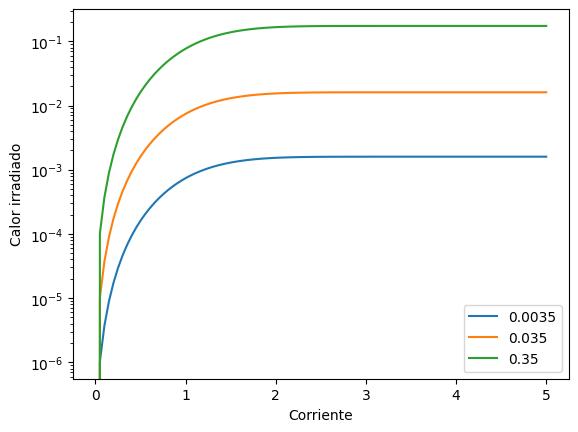

In [ ]:
def E1(x,t):
    return A*exp(x)*tan(t**2/(exp(t**2)))

Avalores  = [0.0035, 0.035, 0.35]
t2 = linspace(0, 5, 100)
for A in Avalores:
    A = A
    SE1_rk4 = RK4(E1, 0, 5, 0, 100)
    plot(t2, SE1_rk4,   label = A)
    xlabel('Corriente')
    ylabel('Calor irradiado')
    legend()
    yscale('log')

## Pendulo doble

Las ecuaciones de movimiento para un pendulo doble son las siguientes

$ (m_1+m_2)L  \ddot{\theta}_1  +  m_2L\cos(\theta_1-\theta_2) \ddot{\theta}_2 = -m_2L\dot{\theta}_2^2\sin(\theta_1-\theta_2)-(m_1+m_2)g\sin\theta_1 .$

$ L\cos(\theta_1-\theta_2)\ddot{\theta}_1 + L\ddot{\theta}_2 = L\dot{\theta}_1^2 \sin(\theta_1-\theta_2) - g\sin\theta_2.$


$$ \left[\begin{matrix} (m_1+m_2)L & m_2L\cos(\theta_1-\theta_2)\\ L\cos(\theta_1-\theta_2)& L\end{matrix}\right]
\left[\begin{matrix} \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix}\right]
= \left[\begin{matrix} -m_2L\dot{\theta}_2^2\sin(\theta_1-\theta_2)-(m_1+m_2)g\sin\theta_1  \\  
L\dot{\theta}_1^2 \sin(\theta_1-\theta_2)
- g\sin\theta_2 \end{matrix}\right]
$$

**a)** Encuentra las soluciones entre $t_o = 0$ y $t_f=20$  si $m_1 = m_2 = 1$, $L = 1$, $g= 9.8$ para las condiciones iniciales

* $\theta_1 = 0$

* $\dot{\theta}_1 = 0$

* $\theta_2 = \pi/6$

* $\dot{\theta}_2 = 0$

**b)**
Repite el procedimiento si la segunda masa aumenta aumenta al doble, y

* $\theta_1 = \pi/3$

* $\dot{\theta}_2 = 0.4$


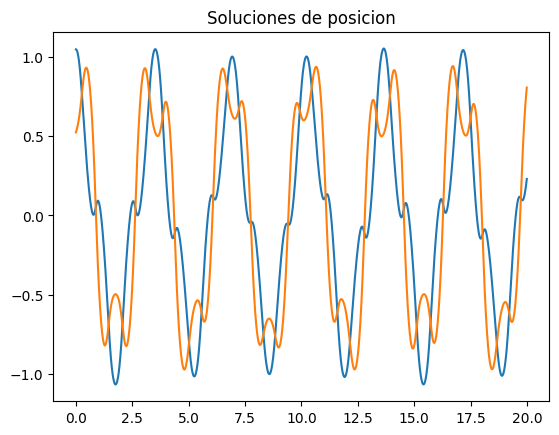

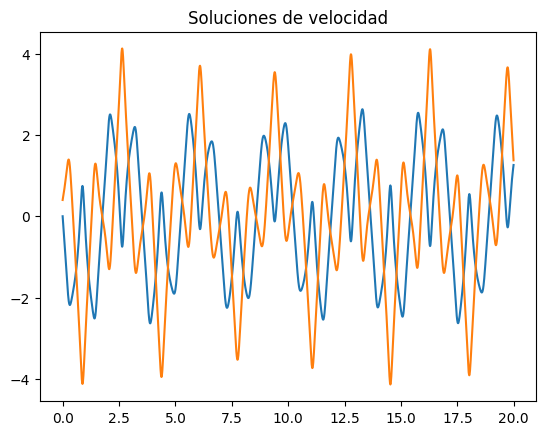

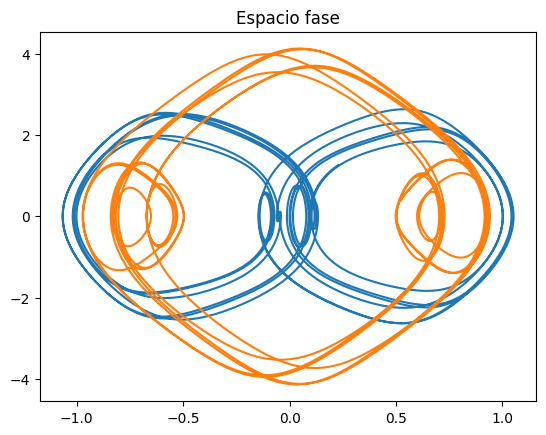

In [ ]:
# Que flojera represtar un sistema acoplado, mejor hacemos algebra lineal
# Tengo que encontrar la representacion del sistema matricial

def Pendulo_doble(r, t): #r un vector donde almacene las soluciones de las variables y sus derivadas
    x1 = r[0]   #variable de posicion1
    x2 = r[1]   #variable de posicion2
    v1 = r[2]   #variable de velocidad1
    v2 = r[3]   #variable de velocidad2

    #Haremos el sistema Ax = b
    a11 = (m1+m2)*l
    a12 = m2*l*np.cos(x1-x2)
    a21 = l*np.cos(x1-x2)
    a22 = l
    A   = np.array( [ [a11, a12], [a21, a22] ] )

    b1 = -m2*l*(v2**2)*sin(x1-x2) - (m1+m2)*g*sin(x1)
    b2 = l*(v1**2)*sin(x1-x2) - g*sin(x2)
    B = array([b1,b2])

    #multiplicacion de matriz inversa A por el lado izquierdo
    x = inv(A).dot(B)

    r = array([v1, v2, x[0], x[1]])
    return r


m1 = 1
m2 = 2
l  = 1.5
g  = 9.8

SOL1 = EDO2_acoplada(Pendulo_doble, 0, 20, pi/3, pi/6, 0, 0.4, 0.01, RK42)
#(lista_t, lista_x, lista_y, lista_vx, lista_vy)
tiempo = SOL1[0]
sol1   = SOL1[1]
sol2   = SOL1[2]
vel1   = SOL1[3]
vel2   = SOL1[4]


plot(tiempo, sol1)
plot(tiempo, sol2)
title('Soluciones de posicion')
show()


plot(tiempo, vel1)
plot(tiempo, vel2)
title('Soluciones de velocidad')
show()

plot(sol1, vel1)
plot(sol2, vel2)
title('Espacio fase')
show()

## Pendulo con resorte
Un pendulo unido a un resorte, presenta las siguientes ecuaciones diferenciales.

$$ \ddot{L} = \left ( L_{o} + L \right )\dot{\theta}^{2} - \frac{k}{m}L + 2g\cos\left ( \theta \right ).$$
$$ \ddot{\theta} = \frac{-2}{L_{o} + L}\left [g\sin\left ( \theta \right ) + \dot{L}\dot{\theta}  \right ].$$

**a)**
Ecuentra las soluciones para $L$ y $\theta$ para un intervalo de tiempo $t_{o} = 0\,s$, $t_{f} =35\,s$ con las siguientes condiciones iniciales

* $L(t=0) = 1m $

* $\dot{L}(t=0) = 0.3 \,m/s$

* $\theta(t=0) = 0.01 \,rad$

* $\dot{\theta}(t=0) = 2 \,rad/s$


Las constantes del sistema son $g = 9.8 \,m/s^{2}$, $L_{o}=1\,m$, $m= 0.1\,kg$, $k = 4 \,N/m$;

**b)** Encuentra y analiza el espacio fase de ambas ecuaciones.

**c)** Grafica la posicion X vs la posicion Y del pendulo.

**d)** Recrea el experimento si el pendulo con resorte esta colgado sobre el techo de un super elevador cuando este va de subida y la gravedad disminuye a la mitad; y cuando va descendiendo y la gravedad aumenta el doble.  ¿Hay consistencia de la informacion física del sistema? Explica con tus palabras el resultado y la represetacion grafica de ello.